<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n20.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.967847,62.802464,-11.824493,138.945818,139.550680,-0.604862
1,0.0,1.0,97.452835,35.866320,-64.048909,79.270246,143.770040,-64.499794
2,0.0,2.0,25.856185,47.408966,-195.922920,-112.657768,32.241750,-144.899518
3,0.0,3.0,54.510062,23.932271,58.535588,146.977921,56.166597,90.811324
4,0.0,4.0,31.165312,31.920068,-92.456717,-19.371338,24.441067,-43.812404
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.885337,58.560318,111.794107,211.239762,87.810058,123.429703
19996,999.0,16.0,67.936353,50.932239,-23.408858,105.459734,197.742535,-92.282800
19997,999.0,17.0,39.371195,86.561600,-222.854770,-86.921975,156.453946,-243.375921
19998,999.0,18.0,39.897865,41.697399,-131.533052,-39.937788,92.623132,-132.560920


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.967847,62.802464,-11.824493,138.945818,139.550680,-0.604862
1,0.0,1.0,97.452835,35.866320,-64.048909,79.270246,143.770040,-64.499794
2,0.0,2.0,25.856185,47.408966,-195.922920,-112.657768,32.241750,-144.899518
3,0.0,3.0,54.510062,23.932271,58.535588,146.977921,56.166597,90.811324
4,0.0,4.0,31.165312,31.920068,-92.456717,-19.371338,24.441067,-43.812404
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.885337,58.560318,111.794107,211.239762,87.810058,123.429703
19996,999.0,16.0,67.936353,50.932239,-23.408858,105.459734,197.742535,-92.282800
19997,999.0,17.0,39.371195,86.561600,-222.854770,-86.921975,156.453946,-243.375921
19998,999.0,18.0,39.897865,41.697399,-131.533052,-39.937788,92.623132,-132.560920


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    77.967847  62.802464  -11.824493  138.945818  139.550680   
      1.0    97.452835  35.866320  -64.048909   79.270246  143.770040   
      2.0    25.856185  47.408966 -195.922920 -112.657768   32.241750   
      3.0    54.510062  23.932271   58.535588  146.977921   56.166597   
      4.0    31.165312  31.920068  -92.456717  -19.371338   24.441067   
...                ...        ...         ...         ...         ...   
999.0 15.0   30.885337  58.560318  111.794107  211.239762   87.810058   
      16.0   67.936353  50.932239  -23.408858  105.459734  197.742535   
      17.0   39.371195  86.561600 -222.854770  -86.921975  156.453946   
      18.0   39.897865  41.697399 -131.533052  -39.937788   92.623132   
      19.0   32.902557  98.925020 -149.121151   -7.293574  153.379680   

                  e_hat  
rep   index              
0.0   0.0     -0.604862  
      1.0    -64.499794  
      2.0   -144.899518  
      3.0     90.811324  
      4.0    -43.812404  
...                 ...  
999.0 15.0   123.429703  
      16.0   -92.282800  
      17.0  -243.375921  
      18.0  -132.560920  
      19.0  -160.673254  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    77.967847  62.802464  -11.824493  138.945818  139.550680   
      1.0    97.452835  35.866320  -64.048909   79.270246  143.770040   
      2.0    25.856185  47.408966 -195.922920 -112.657768   32.241750   
      3.0    54.510062  23.932271   58.535588  146.977921   56.166597   
      4.0    31.165312  31.920068  -92.456717  -19.371338   24.441067   
...                ...        ...         ...         ...         ...   
999.0 15.0   30.885337  58.560318  111.794107  211.239762   87.810058   
      16.0   67.936353  50.932239  -23.408858  105.459734  197.742535   
      17.0   39.371195  86.561600 -222.854770  -86.921975  156.453946   
      18.0   39.897865  41.697399 -131.533052  -39.937788   92.623132   
      19.0   32.902557  98.925020 -149.121151   -7.293574  153.379680   

                  e_hat  
rep   index              
0.0   0.0     -0.604862  
      1.0    -64.499794  
      2.0   -144.899518  
      3.0     90.811324  
      4.0    -43.812404  
...                 ...  
999.0 15.0   123.429703  
      16.0   -92.282800  
      17.0  -243.375921  
      18.0  -132.560920  
      19.0  -160.673254  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.967847,62.802464,-11.824493,138.945818,139.550680,-0.604862
1,0.0,1.0,97.452835,35.866320,-64.048909,79.270246,143.770040,-64.499794
2,0.0,2.0,25.856185,47.408966,-195.922920,-112.657768,32.241750,-144.899518
3,0.0,3.0,54.510062,23.932271,58.535588,146.977921,56.166597,90.811324
4,0.0,4.0,31.165312,31.920068,-92.456717,-19.371338,24.441067,-43.812404
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.885337,58.560318,111.794107,211.239762,87.810058,123.429703
19996,999.0,16.0,67.936353,50.932239,-23.408858,105.459734,197.742535,-92.282800
19997,999.0,17.0,39.371195,86.561600,-222.854770,-86.921975,156.453946,-243.375921
19998,999.0,18.0,39.897865,41.697399,-131.533052,-39.937788,92.623132,-132.560920


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    77.967847  62.802464  -11.824493  138.945818  139.550680   
      1.0    97.452835  35.866320  -64.048909   79.270246  143.770040   
      2.0    25.856185  47.408966 -195.922920 -112.657768   32.241750   
      3.0    54.510062  23.932271   58.535588  146.977921   56.166597   
      4.0    31.165312  31.920068  -92.456717  -19.371338   24.441067   
...                ...        ...         ...         ...         ...   
999.0 15.0   30.885337  58.560318  111.794107  211.239762   87.810058   
      16.0   67.936353  50.932239  -23.408858  105.459734  197.742535   
      17.0   39.371195  86.561600 -222.854770  -86.921975  156.453946   
      18.0   39.897865  41.697399 -131.533052  -39.937788   92.623132   
      19.0   32.902557  98.925020 -149.121151   -7.293574  153.379680   

                  e_hat  
rep   index              
0.0   0.0     -0.604862  
      1.0    -64.499794  
      2.0   -144.899518  
      3.0     90.811324  
      4.0    -43.812404  
...                 ...  
999.0 15.0   123.429703  
      16.0   -92.282800  
      17.0  -243.375921  
      18.0  -132.560920  
      19.0  -160.673254  

[20000 rows x 6 columns]

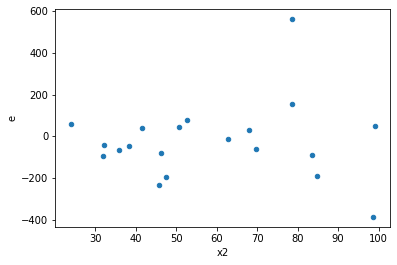

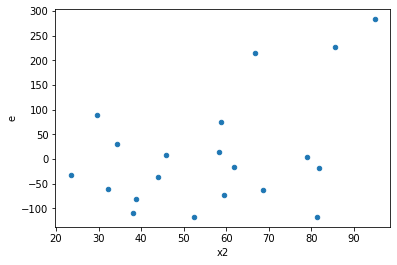

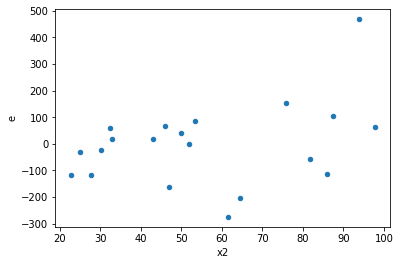

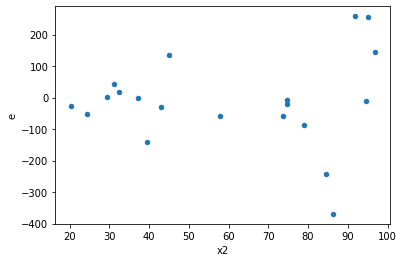

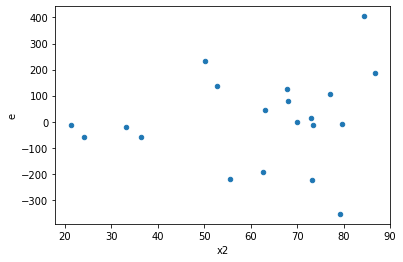

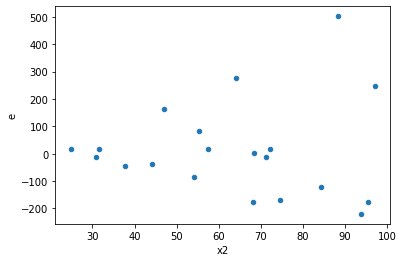

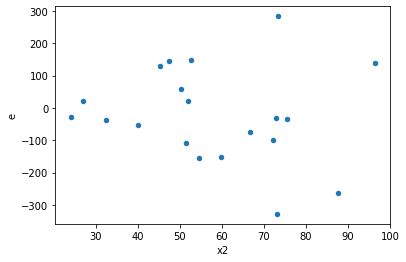

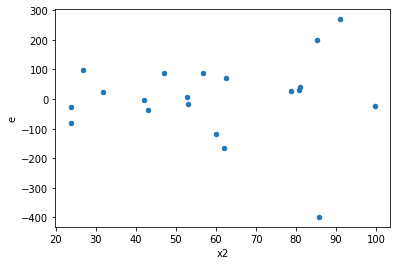

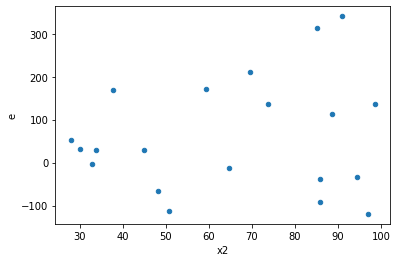

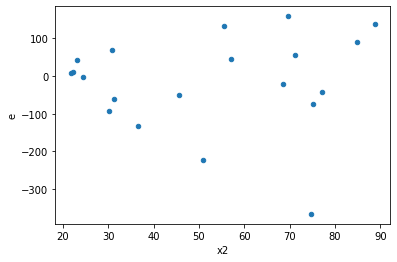

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,37964.677530682085,459811.84740955196,6327.446255113681,76635.307901592,12.111569946509983,0.007888789019776743,0.9960556054901116,0.0039443945098883715,Reject001=0 : Heteroscedasticity
1.0,6.0,6.0,13639.228136319556,132673.44581198544,2273.2046893865927,22112.24096866424,9.727342668218348,0.01402047003652207,0.992989764981739,0.007010235018261035,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,12924.018085737926,196292.14356856546,2154.0030142896544,32715.357261427576,15.188166889458333,0.004288460556345797,0.9978557697218271,0.0021442302781728984,Reject001=0 : Heteroscedasticity
3.0,6.0,6.0,19535.415185546557,237289.83516933068,3255.902530924426,39548.30586155511,12.146649196628879,0.007828331527991228,0.9960858342360044,0.003914165763995614,Reject001=0 : Heteroscedasticity
4.0,6.0,6.0,111461.34311411392,264295.193432653,18576.890519018987,44049.198905442165,2.3711825647217264,0.3173051545516985,0.8413474227241508,0.15865257727584925,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,42839.52778528447,424067.03930762014,7139.921297547411,70677.83988460335,9.898966240549662,0.013400011171410542,0.9932999944142947,0.006700005585705271,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,52360.45867581137,191099.1392674297,8726.74311263523,31849.85654457162,3.6496842101902853,0.14029467450555888,0.9298526627472206,0.07014733725277944,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,17494.757546938916,258780.38197336378,2915.792924489819,43130.063662227294,14.791881583900143,0.004608259282836258,0.9976958703585819,0.002304129641418129,Reject001=0 : Heteroscedasticity
8.0,6.0,6.0,30914.557336929036,216935.12056703994,5152.426222821506,36155.85342783999,7.01724815926443,0.03191182244013713,0.9840440887799314,0.015955911220068564,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,37964.677530682085,459811.84740955196,6327.446255113681,76635.307901592,12.111569946509983,0.007888789019776743,Reject001=0 : Heteroscedasticity
1.0,6.0,6.0,13639.228136319556,132673.44581198544,2273.2046893865927,22112.24096866424,9.727342668218348,0.01402047003652207,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,12924.018085737926,196292.14356856546,2154.0030142896544,32715.357261427576,15.188166889458333,0.004288460556345797,Reject001=0 : Heteroscedasticity
3.0,6.0,6.0,19535.415185546557,237289.83516933068,3255.902530924426,39548.30586155511,12.146649196628879,0.007828331527991228,Reject001=0 : Heteroscedasticity
4.0,6.0,6.0,111461.34311411392,264295.193432653,18576.890519018987,44049.198905442165,2.3711825647217264,0.3173051545516985,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,42839.52778528447,424067.03930762014,7139.921297547411,70677.83988460335,9.898966240549662,0.013400011171410542,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,52360.45867581137,191099.1392674297,8726.74311263523,31849.85654457162,3.6496842101902853,0.14029467450555888,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,17494.757546938916,258780.38197336378,2915.792924489819,43130.063662227294,14.791881583900143,0.004608259282836258,Reject001=0 : Heteroscedasticity
8.0,6.0,6.0,30914.557336929036,216935.12056703994,5152.426222821506,36155.85342783999,7.01724815926443,0.03191182244013713,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      681
Reject001=0 : Heteroscedasticity    319
Name: Result_test, dtype: int64